In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt

In [2]:
#reading data from csv file and expressing as dataframe
data = pd.read_csv("Crop_recommendation.csv")
data = pd.DataFrame(data)

In [3]:
#reading the file from drive giving path
data = pd.read_csv("Crop_recommendation.csv")
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
#Dropping Null Values
data.dropna()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [5]:
#creating two arrays X and Y from the headings of csv file
X = np.array(data[['N','P','K','temperature','humidity','ph','rainfall']])
y = np.array(data[['label']])


# visualization of data

In [6]:
from collections import Counter
label_count=Counter(data['label']) 
print(label_count)

Counter({'rice': 100, 'maize': 100, 'chickpea': 100, 'kidneybeans': 100, 'pigeonpeas': 100, 'mothbeans': 100, 'mungbean': 100, 'blackgram': 100, 'lentil': 100, 'pomegranate': 100, 'banana': 100, 'mango': 100, 'grapes': 100, 'watermelon': 100, 'muskmelon': 100, 'apple': 100, 'orange': 100, 'papaya': 100, 'coconut': 100, 'cotton': 100, 'jute': 100, 'coffee': 100})


In [7]:
crop_name=label_count.keys()
print(crop_name)

dict_keys(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'])


In [8]:
crop_frequency=label_count.values()
print(crop_frequency)

dict_values([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100])


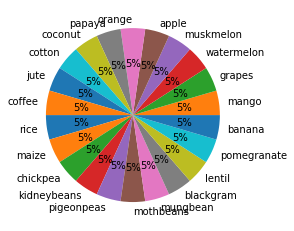

In [9]:
plt.pie(crop_frequency, labels=crop_name, autopct='%0.f%%',startangle=180)
plt.show()

Text(0.5, 1.0, 'Rice')

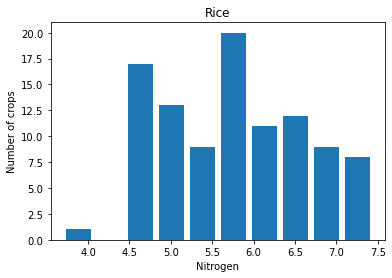

In [10]:
data1= data.iloc[401:501]
data1['ph'].plot.hist(rwidth=0.80)
plt.xlabel('Nitrogen')
plt.ylabel('Number of crops')
plt.title('Rice')

In [11]:
#creating two arrays X and Y from the headings of csv file
X = np.array(data[['N','P','K','temperature','humidity','ph','rainfall']])
y = np.array(data[['label']])

In [12]:
# let's reserve 30% of the data for test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [14]:
X_train.shape

(1540, 7)

In [15]:
X_test.shape

(660, 7)

In [16]:
predictions = clf.predict(X_test)
predictions

array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
       'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'cotton',
       'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'jute',
       'pomegranate', 'lentil', 'jute', 'lentil', 'jute', 'blackgram',
       'jute', 'chickpea', 'chickpea', 'kidneybeans', 'papaya', 'mango',
       'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
       'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
       'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'blackgram',
       'watermelon', 'coconut', 'lentil', 'orange', 'papaya', 'blackgram',
       'orange', 'rice', 'muskmelon', 'pigeonpeas', 'muskmelon',
       'coconut', 'jute', 'banana', 'blackgram', 'papaya', 'banana',
       'cotton', 'watermelon', 'orange', 'coffee', 'chickpea'

In [17]:
print("Accuracy of our classifier using SVM classifier is:",clf.score(X_test,y_test))

Accuracy of our classifier using SVM classifier is: 0.9636363636363636


In [18]:
my_array = []
classes = ['Nitrogen','Phosphorus','Potassium','temperature','humidity','ph','rainfall']
print("Enter the array of size 7:")
for i in range(7):
    my_array.append(float(input(classes[i])))
my_array = np.array(my_array)
print(np.floor(my_array))

Enter the array of size 7:
Nitrogen34
Phosphorus34
Potassium3
temperature34
humidity34
ph34
rainfall34
[34. 34.  3. 34. 34. 34. 34.]


In [19]:
clf.predict([my_array])

array(['mothbeans'], dtype=object)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [21]:
print(neigh.predict([my_array]))

['mothbeans']


### 